# - AlexNet

In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Conv2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

In [2]:
img_dir = 'Images3'
categories = os.listdir(img_dir)
num_classes = len(categories)

In [3]:
image_w = 224
image_h = 224

In [4]:
X = []
y = []

for index, breed in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[index] = 1

    image_dir = img_dir + "/" + breed
    files = glob.glob(image_dir+"/*.jpg")
    print(index, ")", breed, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

0 ) n02085620-Chihuahua  파일 길이 :  152
1 ) n02085782-Japanese_spaniel  파일 길이 :  185
2 ) n02085936-Maltese_dog  파일 길이 :  252
3 ) n02086079-Pekinese  파일 길이 :  149
4 ) n02086240-Shih-Tzu  파일 길이 :  214
5 ) n02086646-Blenheim_spaniel  파일 길이 :  188
6 ) n02086910-papillon  파일 길이 :  196
7 ) n02088364-beagle  파일 길이 :  195
8 ) n02088466-bloodhound  파일 길이 :  187
9 ) n02089078-black-and-tan_coonhound  파일 길이 :  159
10 ) n02089867-Walker_hound  파일 길이 :  153
11 ) n02089973-English_foxhound  파일 길이 :  157
12 ) n02091032-Italian_greyhound  파일 길이 :  182
13 ) n02091134-whippet  파일 길이 :  187
14 ) n02093256-Staffordshire_bullterrier  파일 길이 :  155
15 ) n02093647-Bedlington_terrier  파일 길이 :  182
16 ) n02094258-Norwich_terrier  파일 길이 :  185
17 ) n02094433-Yorkshire_terrier  파일 길이 :  164
18 ) n02096294-Australian_terrier  파일 길이 :  196
19 ) n02096585-Boston_bull  파일 길이 :  182
20 ) n02097047-miniature_schnauzer  파일 길이 :  154
21 ) n02097209-standard_schnauzer  파일 길이 :  155
22 ) n02097658-silky_terrier  파일 길이 :  183

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
n = np.arange(X.shape[0]) # 데이터 셔플링
np.random.seed(0)
np.random.shuffle(n)

In [9]:
X = X[n]
y = y[n]

In [10]:
print("Images shape after shuffling = ",X.shape,"\nLabels shape after shuffling = ",y.shape)

Images shape after shuffling =  (11411, 224, 224, 3) 
Labels shape after shuffling =  (11411, 65)


In [11]:
# 정규화
X = X.astype(np.float32)
y = y.astype(np.int32)
X = X/255.

In [12]:
# 데이터 분할(train, validate, test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [13]:
print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)

print("\nx_val shape = ",x_val.shape)
print("y_val shape = ",y_val.shape)

print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (8215, 224, 224, 3)
y_train shape =  (8215, 65)

x_val shape =  (913, 224, 224, 3)
y_val shape =  (913, 65)

x_test shape =  (2283, 224, 224, 3)
y_test shape =  (2283, 65)


In [14]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=64,kernel_size=(7,7),strides=(3,3),padding="valid",activation="relu",input_shape=(image_w,image_h,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=128,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=192,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(Flatten())

#1 dense layer
model.add(Dense(2048,input_shape=(image_w,image_h,3),activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#2 dense layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#output layer
model.add(Dense(65,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 64)        9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 36, 36, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 192)       2

In [15]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
K.set_value(model.optimizer.learning_rate, 0.0001)

In [16]:
early_stopping= EarlyStopping(monitor='val_loss', mode ='min', verbose = 1, patience = 10)
model_checkPoint = ModelCheckpoint('AlexNet.h5', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

In [17]:
history =model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), shuffle=True, batch_size=128, callbacks=[early_stopping, model_checkPoint])

Epoch 1/100
65/65 [==============================] - ETA: 0s - loss: 4.5090 - accuracy: 0.0521
Epoch 00001: val_loss improved from inf to 4.24364, saving model to AlexNet.h5
65/65 [==============================] - 142s 2s/step - loss: 4.5090 - accuracy: 0.0521 - val_loss: 4.2436 - val_accuracy: 0.0263
Epoch 2/100
65/65 [==============================] - ETA: 0s - loss: 3.9109 - accuracy: 0.0981
Epoch 00002: val_loss did not improve from 4.24364
65/65 [==============================] - 141s 2s/step - loss: 3.9109 - accuracy: 0.0981 - val_loss: 4.4777 - val_accuracy: 0.0197
Epoch 3/100
65/65 [==============================] - ETA: 0s - loss: 3.5473 - accuracy: 0.1452
Epoch 00003: val_loss did not improve from 4.24364
65/65 [==============================] - 137s 2s/step - loss: 3.5473 - accuracy: 0.1452 - val_loss: 4.6764 - val_accuracy: 0.0186
Epoch 4/100
65/65 [==============================] - ETA: 0s - loss: 3.2118 - accuracy: 0.2012
Epoch 00004: val_loss did not improve from 4.2436

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)

print('\nLoss: {:.4f}, Acc: {:.4f}'.format(loss, accuracy))

72/72 [==============================] - 8s 109ms/step - loss: 3.6556 - accuracy: 0.1949

Loss: 3.6556, Acc: 0.1949


In [19]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc=0)

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc=0)

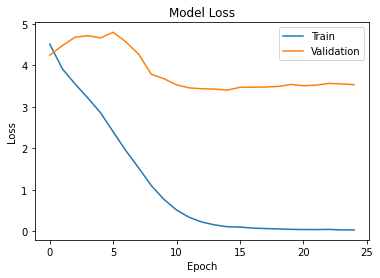

In [20]:
plot_loss(history)
plt.show()

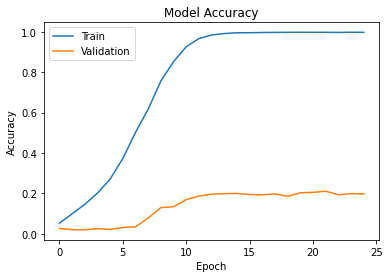

In [21]:
plot_acc(history)
plt.show()

In [22]:
predictions = model.predict(x_test)

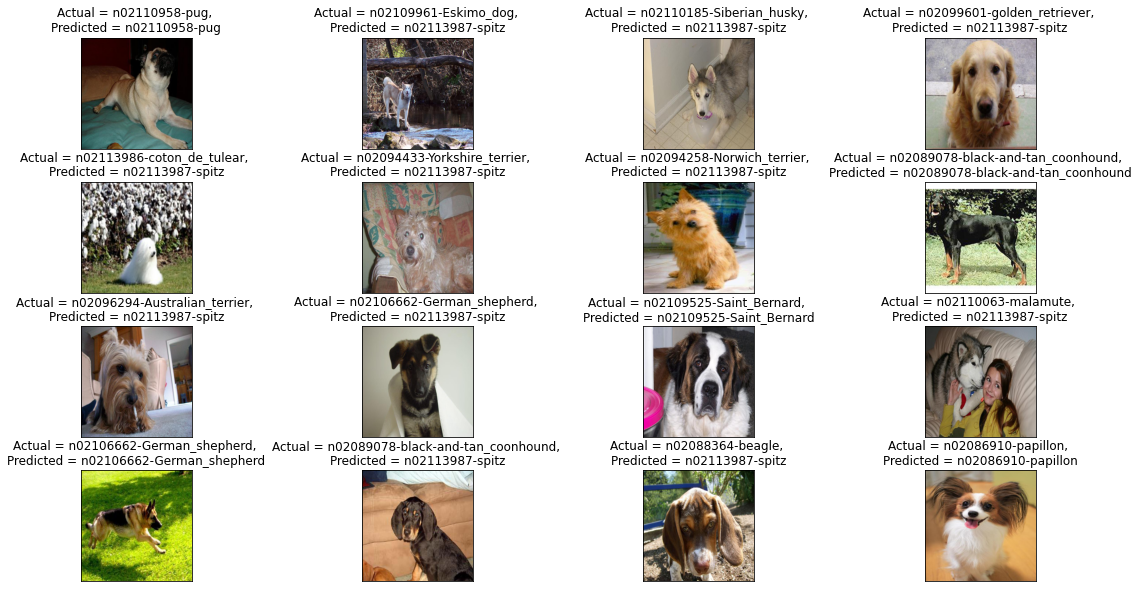

In [23]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(16):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(4, 4, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, \nPredicted = {}'.format(categories[np.argpartition(y_test[r[0]],-1)[-1:][0]] , categories[np.argpartition(predictions[r[0]][y_test[r[0]]],-1)[-1:][0]]))
    plt.xticks([]) , plt.yticks([])

plt.show()